In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim

In [74]:
csv = os.path.join("Resources/Life_expectancy_data_Proj_1.csv")
GDP = os.path.join("Resources/GDPbillions.csv")

In [4]:
pwd

'/Users/geetharajendram/Documents/Project1'

In [5]:
df = pd.read_csv(csv)

In [6]:
df.dropna(how='any')
df.dtypes

Country     object
Year         int64
Female     float64
Male       float64
Total      float64
dtype: object

In [7]:
df.head()

,Country,Year,Female,Male,Total
0,Australia,1921,63.18,59.10,60.97
1,Australia,1922,65.11,60.88,62.83
2,Australia,1923,63.66,59.98,61.68
3,Australia,1924,64.51,60.77,62.48
4,Australia,1925,65.38,61.30,63.17


In [8]:
df.count()

Country    323
Year       323
Female     323
Male       323
Total      323
dtype: int64

In [9]:
#Convert data types to relevant object
# df= df.astype{}, errors='raise'

In [10]:
life_df1 = df.loc[df["Year"] > 2007, ["Country", "Year", "Female", "Male", "Total"]]

In [11]:
life_df2 = life_df1.loc[life_df1["Year"] < 2019, ["Country", "Year", "Female", "Male", "Total"]]

In [12]:
life_df2.head(20)

,Country,Year,Female,Male,Total
87,Australia,2008,83.70,79.14,81.43
88,Australia,2009,84.00,79.44,81.73
89,Australia,2010,84.20,79.81,82.02
90,Australia,2011,84.25,79.92,82.09
91,Australia,2012,84.30,80.27,82.30
92,Australia,2013,84.62,80.47,82.55
93,Australia,2014,84.50,80.53,82.52
94,Australia,2015,84.62,80.57,82.60
95,Australia,2016,84.85,80.75,82.81
96,Australia,2017,84.75,80.69,82.72


In [13]:
# Use the code provided to separate the data by year
Aus = life_df2[(life_df2["Country"] == 'Australia')]
Chil = life_df2[(life_df2["Country"] == 'Chile')]
HngKng = life_df2[(life_df2["Country"] == 'HongKong')]
Hun = life_df2[(life_df2["Country"] == 'Hungary')]
USA = life_df2[(life_df2["Country"] == 'USA')]


#Group by "Country" and take the mean of each of life expectancy disregarding gender.
mean_life_01 = Aus.groupby(["Year"]).mean()["Total"]
mean_life_02 = Chil.groupby(["Year"]).mean()["Total"]
mean_life_03 = HngKng.groupby(["Year"]).mean()["Total"]
mean_life_04 = Hun.groupby(["Year"]).mean()["Total"]
mean_life_05 = USA.groupby(["Year"]).mean()["Total"]


#Data frame of life expectancy by country
life_ex_country_df = pd.DataFrame({"Australia": mean_life_01,
    "Chile": mean_life_02,
    "HongKong": mean_life_03,
    "Hungary": mean_life_04,
     "USA": mean_life_05                               
   })

life_ex_country_df




,Australia,Chile,HongKong,Hungary,USA
Year,,,,,
2008,81.43,78.24,82.03,73.96,78.17
2009,81.73,78.40,82.59,74.18,78.52
2010,82.02,78.15,82.80,74.52,78.71
2011,82.09,78.78,83.24,74.91,78.76
2012,82.30,78.79,83.28,75.18,78.87
2013,82.55,78.99,83.84,75.68,78.88
2014,82.52,79.09,83.94,75.85,78.94
2015,82.60,79.30,84.15,75.65,78.79
2016,82.81,79.57,84.31,76.16,78.76


In [15]:

y_axis = life_ex_country_df.values.tolist()
x_axis = [life_ex_country_df.columns.values.tolist()]

y_axis

[[81.43, 78.24, 82.03, 73.96, 78.17],
 [81.73, 78.4, 82.59, 74.18, 78.52],
 [82.02, 78.15, 82.8, 74.52, 78.71],
 [82.09, 78.78, 83.24, 74.91, 78.76],
 [82.3, 78.79, 83.28, 75.18, 78.87],
 [82.55, 78.99, 83.84, 75.68, 78.88],
 [82.52, 79.09, 83.94, 75.85, 78.94],
 [82.6, 79.3, 84.15, 75.65, 78.79],
 [82.81, 79.57, 84.31, 76.16, 78.76],
 [82.72, 79.74, 84.72, 76.0, 78.73],
 [83.26, 79.99, 85.05, 76.2, 78.88]]

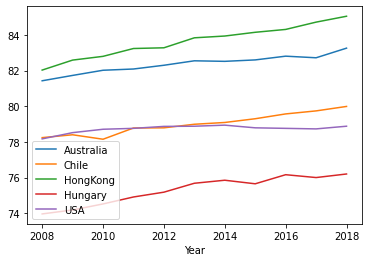

In [16]:
plot = life_ex_country_df.plot.line()

In [29]:
csv1= os.path.join("Resources/GDPbillions.csv")
new_df=pd.read_csv(csv1)
gdp_df=new_df.set_index('Country')
gdp_df


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Australia,1055.64,928.63,1148.61,1398.41,1546.89,1576.38,1467.55,1350.62,1206.54,1326.52,1428.29
Chile,179.66,171.41,217.11,251.22,267.18,277.24,259.41,242.50,249.30,276.36,295.40
Hong Kong,219.28,214.05,228.64,248.51,262.63,275.70,291.46,309.38,320.86,341.27,361.73
Hungary,158.33,131.07,132.18,141.94,128.81,135.68,141.03,125.17,128.61,143.11,160.56
United States,14769.86,14478.06,15048.96,15599.73,16253.97,16843.19,17550.68,18206.02,18695.11,19477.34,20533.06


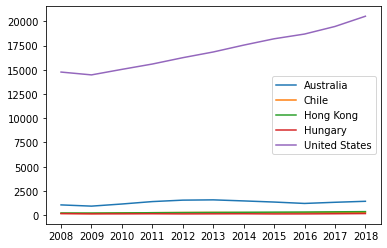

<Figure size 432x288 with 0 Axes>

In [45]:
for index, row in gdp_df.iterrows():
    plt.plot(row, label=index)
    plt.legend()
plt.xlabel=("Years")
plt.ylabel=('GDP in $Billions')
plt.show()
plt.tight_layout()

In [65]:
csv2= os.path.join("Resources/percapita.csv")
pcap_df=pd.read_csv(csv2)
percap_df =pcap_df.set_index('Country')
percap_df


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Australia,49.68,42.81,52.13,62.60,68.04,68.16,62.51,56.71,49.88,53.94,57.21
Chile,10.78,10.18,12.77,14.63,15.41,15.83,14.67,13.57,13.79,15.05,15.80
Hong Kong,31.52,30.70,32.55,35.14,36.73,38.40,40.32,42.43,43.73,46.16,48.54
Hungary,15.77,13.08,13.22,14.23,12.98,13.72,14.29,12.72,13.10,14.62,16.43
United States,48.57,47.19,48.65,50.07,51.78,53.29,55.12,56.76,57.87,59.91,62.82


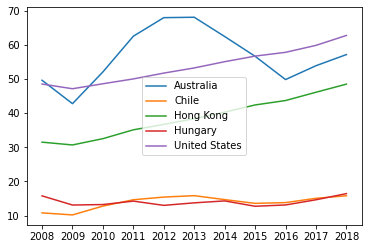

<Figure size 432x288 with 0 Axes>

In [66]:
for index, row in percap_df.iterrows():
    plt.plot(row, label=index)
    plt.legend()
plt.xlabel=("Years")
plt.ylabel=('Percapita in K$')
plt.show()
plt.tight_layout()

In [68]:
percap1_df=percap_df.transpose()
percap1_df

Country,Australia,Chile,Hong Kong,Hungary,United States
2008,49.68,10.78,31.52,15.77,48.57
2009,42.81,10.18,30.70,13.08,47.19
2010,52.13,12.77,32.55,13.22,48.65
2011,62.60,14.63,35.14,14.23,50.07
2012,68.04,15.41,36.73,12.98,51.78
2013,68.16,15.83,38.40,13.72,53.29
2014,62.51,14.67,40.32,14.29,55.12
2015,56.71,13.57,42.43,12.72,56.76
2016,49.88,13.79,43.73,13.10,57.87
2017,53.94,15.05,46.16,14.62,59.91
